<a href="https://colab.research.google.com/github/zaidsallam10/Garbage_Classification_SVM/blob/main/SVM_Garbage_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook has two different trained models using SVM algorithm to classify metal,paper,glass,plastic and cardboard**

model1: trained on 200 image for each category.
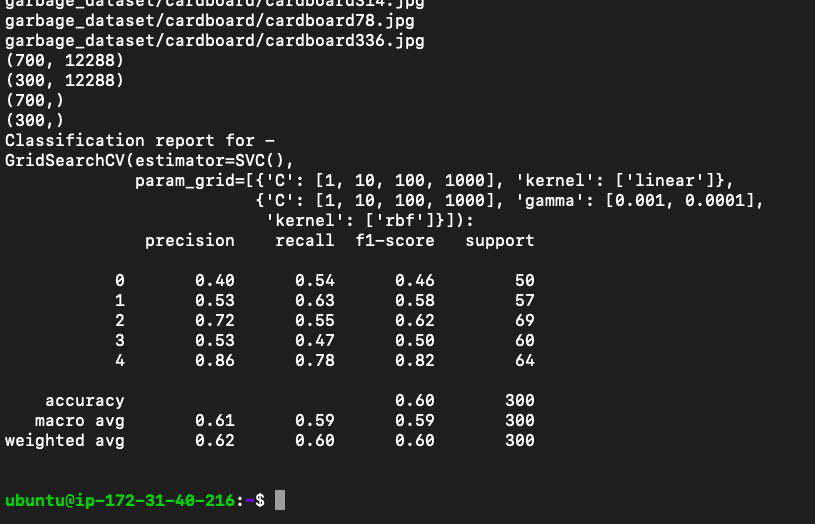

model2: trained on >700 image for each category.
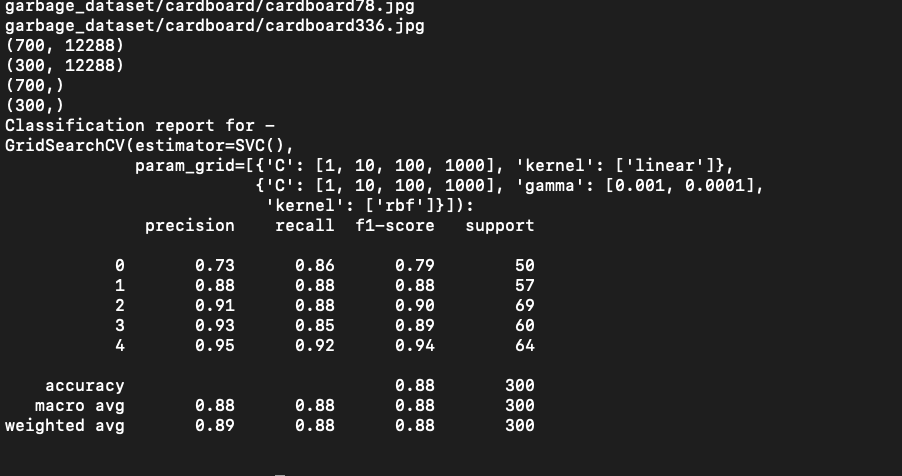

Import Required Libaries

In [9]:
#!pip uninstall scikit-learn
#!pip install scikit-learn==0.21.2
#!pip install scikit-learn --upgrade
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
from skimage.transform import resize
import pickle
categories=['glass', 'plastic', 'paper', 'metal', 'cardboard']



Load pretrained-models from s3

In [11]:
#!wget 'https://zaidartest00.s3.us-east-2.amazonaws.com/svm/finalized_model_600_imagge_each.sav'
#!wget 'https://zaidartest00.s3.us-east-2.amazonaws.com/svm/svm_model_v1'

This function used to prepare the data for training

In [12]:
def load_image_files(container_path, dimension=(64, 64)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        print(direc)
        for file in direc.iterdir():
            print(file)
            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)



Prepare the train and test sets

In [ ]:
image_dataset = load_image_files("garbage_dataset/")
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


**Training Code**

In [ ]:
#param_grid = [
 # {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 # {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 #]
#svc = svm.SVC()
#clf = GridSearchCV(svc, param_grid)
#clf.fit(X_train, y_train)

#y_pred = clf.predict(X_test)

#print("Classification report for - \n{}:\n{}\n".format(
#    clf, metrics.classification_report(y_test, y_pred)))
#pickle.dump(clf, open(filename, 'wb'))


**Prediction Code**

In [22]:

model1='/content/drive/MyDrive/finalized_model.sav'
model2='/content/drive/MyDrive/finalized_model_600_imagge_each.sav'

In [27]:
# Load the model
clf = pickle.load(open(model2, 'rb'))


In [17]:
def preprocess_image(image_path):
        flat_data=[]
        dimension=(64, 64)
        img = imread(image_path)
        img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
        flat_data.append(img_resized.flatten())
        result=np.array(flat_data) 
        return result


In [36]:
image_path='/content/drive/MyDrive/dataset final/glass/20210224_163752.jpg'
original_label='glass'
res=clf.predict(preprocess_image(image_path))
print(res)
print('original=',original_label)
print('predicted= ',categories[res[0]])


[0]
original= glass
predicted=  glass


In [37]:
image_path='/content/drive/MyDrive/dataset final/card board/20210224_155010.jpg'
original_label='card board'
res=clf.predict(preprocess_image(image_path))
print(res)
print('original=',original_label)
print('predicted= ',categories[res[0]])


[4]
original= card board
predicted=  cardboard
